In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.units as units
import matplotlib.ticker as ticker
import random
import time                   # To time processes
import warnings               # To suppress warnings
import itertools
import datetime
import tensorflow as tf
import csv
import math

from random import shuffle
from pandas import read_csv
from sklearn import metrics
from sklearn import svm
from matplotlib import pyplot
from numpy import array
from numpy import argmax
from scipy import stats


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.cluster import KMeans
from sklearn.metrics import precision_recall_curve

from sklearn.utils import class_weight
from sklearn.utils.fixes import signature
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.base import TransformerMixin
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import Callback

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.over_sampling import RandomOverSampler

from matplotlib.pyplot import *

warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
dataset=read_csv("matches.csv")

**<font color=darkblue>To get information about the dimensions of the dataset (No of rows, No of columns)</font>**

In [3]:
dataset.shape

(696, 18)

In [4]:
dataset=dataset.drop(['umpire3'], axis=1)

In [5]:
dataset.team1.unique().tolist()

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Gujarat Lions',
 'Rising Pune Supergiants',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Delhi Daredevils',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Deccan Chargers',
 'Kochi Tuskers Kerala',
 'Pune Warriors']

**<font color=darkblue>Extracting the Venue Names alone from the whole dataset and storing as a List</font>**

In [6]:
venue_name=dataset.venue.unique().tolist()

**<font color=darkblue>Creating a new Dataframe called "Venue_Info" which will contain Venue Name and Number of matches played in each venue</font>**

In [7]:
venue_info=pd.DataFrame(venue_name, columns=['Venue Name'])

**<font color=darkblue>Sorting the Venue Names in alphabetical order</font>**

In [8]:
venue_info=venue_info.sort_values('Venue Name')

**<font color=darkblue>After sorting we need to reset the index of each venue by using 'reset_index'</font>**

In [9]:
venue_info=venue_info.reset_index(drop=True)

In [10]:
venue_info

,Venue Name
0,Barabati Stadium
1,Brabourne Stadium
2,Buffalo Park
3,De Beers Diamond Oval
4,Dr DY Patil Sports Academy
5,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...
6,Dubai International Cricket Stadium
7,Eden Gardens
8,Feroz Shah Kotla
9,Green Park


**<font color=darkblue>Store the number of matches played in each venue as a temporary list</font>**

In [11]:
temp=dataset.groupby('venue').size().tolist()

In [12]:
temp

[7,
 11,
 3,
 3,
 17,
 11,
 7,
 70,
 67,
 4,
 9,
 9,
 7,
 15,
 73,
 49,
 21,
 5,
 8,
 7,
 2,
 14,
 35,
 56,
 12,
 10,
 40,
 6,
 6,
 7,
 7,
 17,
 12,
 3,
 66]

**<font color=darkblue>Now add this as the next column in the DataFrame</font>**

In [13]:
venue_info['Number of matches']=temp

In [14]:
venue_info

,Venue Name,Number of matches
0,Barabati Stadium,7
1,Brabourne Stadium,11
2,Buffalo Park,3
3,De Beers Diamond Oval,3
4,Dr DY Patil Sports Academy,17
5,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,11
6,Dubai International Cricket Stadium,7
7,Eden Gardens,70
8,Feroz Shah Kotla,67
9,Green Park,4


**<font color=darkblue>Sorting the whole dataframe in descending order to get the top 10 venues</font>**

In [18]:
venue_info=venue_info.sort_values('Number of matches',ascending=False)

In [20]:
venue_info=venue_info.reset_index(drop=True)

In [21]:
venue_info

,Venue Name,Number of matches
0,M Chinnaswamy Stadium,73
1,Eden Gardens,70
2,Feroz Shah Kotla,67
3,Wankhede Stadium,66
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,40
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Dr DY Patil Sports Academy,17


In [27]:
top_venues=venue_info[0:10]['Venue Name'].tolist()
top_matches=venue_info[0:10]['Number of matches'].tolist()

**<font color=darkblue>Plotting the results as a Bar Graph using Matplotlib</font>**

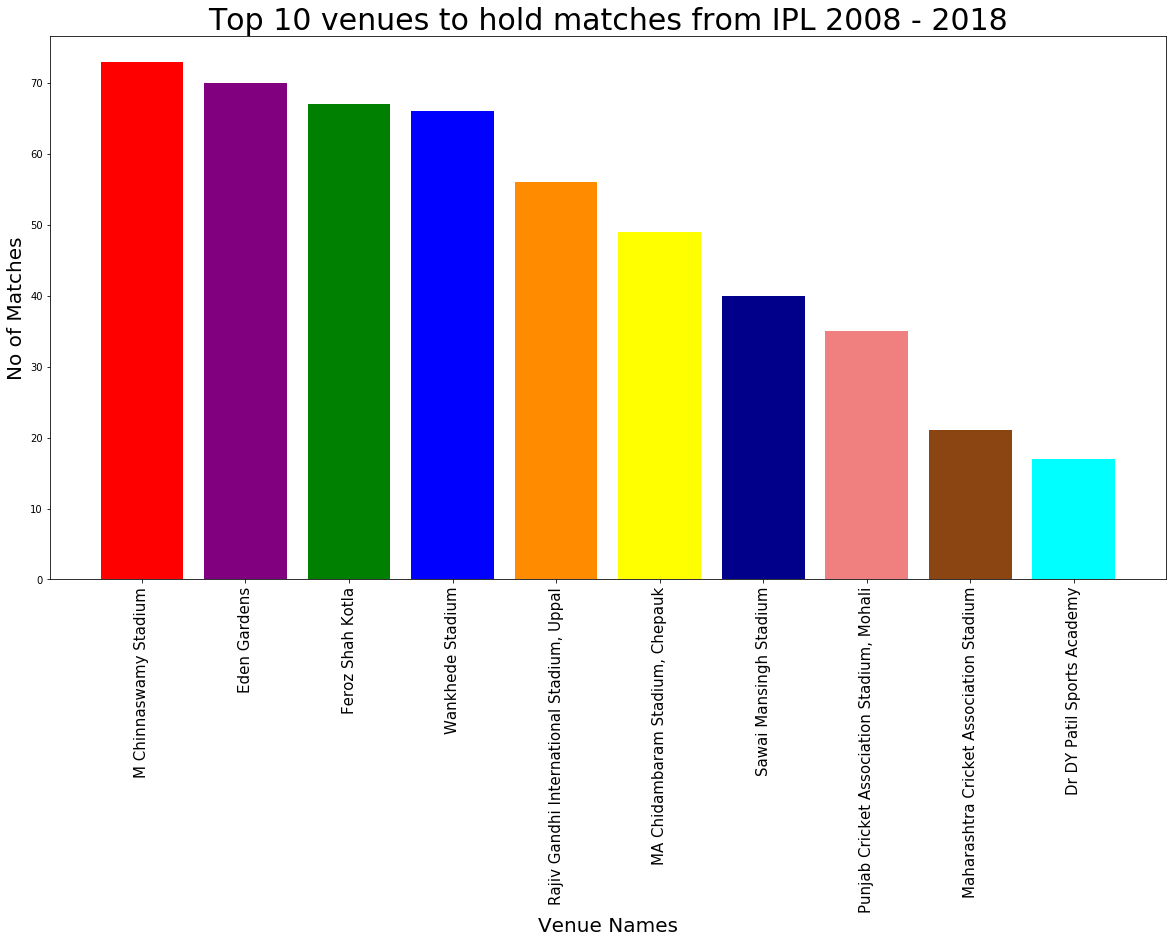

In [42]:
plt.figure(figsize=(20,10))
index = np.arange(len(top_venues))
plt.bar(index, top_matches, color=['red','purple','green', 'blue', 'darkorange','yellow','darkblue','lightcoral','saddlebrown','cyan'])
plt.xlabel('Venue Names', fontsize=20)
plt.ylabel('No of Matches', fontsize=20)
plt.xticks(index, top_venues, fontsize=15, rotation=90)
plt.title('Top 10 venues to hold matches from IPL 2008 - 2018', fontsize=30)
plt.show()